**Importing Necessary Libraries**

In [ ]:
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import cv2
import numpy as np
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split

**Loading Drive and Dataset**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_dir= '/content/drive/MyDrive/CKD_Data'
ckd_data= '/content/drive/MyDrive/CKD_Data/CKD'
not_ckd_data = '/content/drive/MyDrive/CKD_Data/Not_CKD'

**Checking image classes and the images**

In [ ]:
for image_class in os.listdir(data_dir):
  print(image_class)

CKD
Not_CKD


In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    print(image)



stone1.jpg
stone2.jpg
stone3.jpg
stone4.jpg
stone5.jpg
stone6.jpg
stone7.jpg
stone8.jpg
pelvic_stone1.jpg
p_stone2.jpg
p_stone3.jpg
left.jpg
hypolasia1.jpg
dupex1.jpg
dupex2.jpg
dupex3.jpg
dupex4.jpg
dupex5.jpg
dupex6.jpg
dupex7.jpg
dupex8.jpg
dupex9.jpg
horse_shoe1.jpg
R_horse_shoe.jpg
horse_shoe2.jpg
horse_shoe3.jpg
horse_shoe_stone1.jpg
HS_R1.jpg
HS_L1.jpg
HSK_1.jpg
abnormal_position1.jpg
abnormal_position2.jpg
abnormal_position3.jpg
abnormal_position4.jpg
Renal_ectopiaW_abnormal1.jpg
Renal_ectopiaW_abnormal2.jpg
Renal_ectopiaW_abnormal3.jpg
Renal_ectopiaW_abnormal4.jpg
Pelvic_anomali1.jpg
Pelvic_anomali2.jpg
Pelvic_anomali3.jpg
Pelvic_anomali4.jpg
Pelvic_anomali5.jpg
Pelvic_anomali6.jpg
Pelvic_kidney1.jpg
Pelvic_kidney2.jpg
Pelvic_kidney3.jpg
no_kidney_in_normal_location1.jpg
Pelvic_kidney4.jpg
crossed_renal_ectopia_left1.jpg
crossed_renal_ectopia_R1.jpg
crossed_renal_ectopia_R2.jpg
crossed_renal_ectopia_left2.jpg
crossed_renal_ectopia_R3.jpg
crossed_renal_ectopia_left3.jpg
crossed



---



---


# ***Data Preprocessing***  -



---



---



*1. Resizing*


In [ ]:
'''
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir,image_class)):
    #loading the images
    image_path = os.path.join(data_dir, image_class, image)
    images = cv2.imread(image_path)

    if image is not None:
      resized_data = cv2.resize(images, (256,256))

      print("Resized images shape ", resized_data.shape)

    else:
      print("Error loading images at ", image_path)
'''
#Resizing images one by one directory rather than just
#merging both directories and resizing all

def ckd_resized(data_path):

  for image in os.listdir(data_path):
    ckd_path = os.path.join(data_path,image)
    ckd_images = cv2.imread(ckd_path)

    if ckd_images is not None:
      resized_ckd = cv2.resize(ckd_images, (256,256))
      print("Resized CKD images = ", resized_ckd.shape)
    else:
      print("Could not resize image ")





Streaming output truncated to the last 5000 lines.
  [19 19 19]
  [22 22 22]]]
Resized CKD images =  [[[229 229 229]
  [188 188 188]
  [195 195 195]
  ...
  [192 192 192]
  [197 197 197]
  [193 193 193]]

 [[178 178 178]
  [ 23  23  23]
  [ 24  24  24]
  ...
  [ 22  22  22]
  [ 59  59  59]
  [188 188 188]]

 [[166 166 166]
  [  0   0   0]
  [  1   1   1]
  ...
  [  3   3   3]
  [ 14  14  14]
  [183 183 183]]

 ...

 [[168 168 168]
  [  3   3   3]
  [  3   3   3]
  ...
  [  2   2   2]
  [ 15  15  15]
  [188 188 188]]

 [[226 226 226]
  [138 138 138]
  [128 128 128]
  ...
  [132 132 132]
  [136 136 136]
  [212 212 212]]

 [[162 162 162]
  [164 164 164]
  [163 163 163]
  ...
  [162 162 162]
  [163 163 163]
  [129 129 129]]]
Resized CKD images =  [[[229 229 229]
  [188 188 188]
  [195 195 195]
  ...
  [192 192 192]
  [197 197 197]
  [193 193 193]]

 [[178 178 178]
  [ 23  23  23]
  [ 24  24  24]
  ...
  [ 22  22  22]
  [ 59  59  59]
  [188 188 188]]

 [[166 166 166]
  [  0   0   0]
  [  1 

In [ ]:

#ckd_resized(ckd_data)

def Not_CKD_resized(data_path):

  for image in os.listdir(data_path):
    not_ckd_path = os.path.join(data_path, image)
    not_ckd_images = cv2.imread(not_ckd_path)

    if not not_ckd_images is not None:
      resized_not_ckd = cv2.resize(not_ckd_images, (256,256))
      print("Resized Not CKD Images ", not_ckd_images.shape)

    else:
      print("Error in resizing images")

2. Resizing, Grescaling, Normalization, CLAHE normalization

In [ ]:

processed_data_dir = "/content/drive/MyDrive/Processed_CKD_Data"

In [ ]:


#parameters for CLAHE processing
clip_limit = 1.0
grid_size = (16,16)


# Iterate through each image in each class directory
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        # Load the image
        image_path = os.path.join(data_dir, image_class, image)
        img = cv2.imread(image_path)

        if img is not None:
            # Resize the image to 256x256
            resized_image = cv2.resize(img, (256, 256))

            # Convert the resized image to grayscale
            grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)

            # Print the shape of the grayscale image
            #print("Grayscale image shape:", grayscale_image.shape)
            normalized_images = grayscale_image / 255.0
            normalized_image_uint8 = (normalized_images * 255).astype('uint8')

            clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
            clahe_img = clahe.apply(normalized_image_uint8)

            # Construct the path to save the grayscale image
            processed_image_path = os.path.join(processed_data_dir, image_class, image)

            # Ensure the directory for processed images exists
            os.makedirs(os.path.dirname(processed_image_path), exist_ok=True)
            # Savinf the processed images
            cv2.imwrite(processed_image_path, clahe_img)
        else:
            print("Error loading image at:", image_path)


In [ ]:
test_data = "/content/drive/MyDrive/CLAHE_CKD_data"
for i in os.listdir(test_data):
  image_path = os.path.join(test_data, i)
  images = cv2.imread(image_path)
  print(images.shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 

In [ ]:
test_data_2 = "/content/drive/MyDrive/CKD_Data"
for image_class in os.listdir(test_data_2):
  print(image_class)
  for image in os.listdir(os.path.join(test_data_2, image_class)):
    read_imgs = os.path.join(test_data_2,image_class, image)
    prin_image = cv2.imread(read_imgs)
    print(prin_image.shape)


CKD
(331, 461, 3)
(327, 461, 3)
(331, 462, 3)
(330, 461, 3)
(332, 461, 3)
(331, 461, 3)
(329, 461, 3)
(331, 461, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(369, 544, 3)
(367, 543, 3)
(364, 543, 3)
(366, 544, 3)
(366, 544, 3)
(366, 544, 3)
(378, 543, 3)
(366, 544, 3)
(374, 544, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(322, 458, 3)
(322, 461, 3)
(319, 461, 3)
(319, 461, 3)
(316, 461, 3)
(319, 460, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(225, 300, 3)
(450, 600, 3)
(367, 520, 3)
(363, 520, 3)
(377, 520, 3)
(365, 520, 3)
(363, 520, 3)
(366, 520, 3)
(374, 532, 3)
(375, 532, 3)
(378, 532, 3)
(378, 532, 3)
(373, 532, 3)
(378, 532, 3)
(374, 532, 3)
(365, 532, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(450, 600, 3)
(389, 555, 3)
(3

Applying CLAHE normalization on the greyscaled images separately.

In [ ]:
clahe_img_dir = "/content/drive/MyDrive/CLAHE_CKD_data"
greyScale_imgs = "/content/drive/MyDrive/CKD"

clip_limit = 1.0  # Threshold for contrast limiting
tile_grid_size = (16, 16)

def clahe_normalization_ckd(data_path):
  for images in os.listdir(data_path):
    img_path = os.path.join(greyScale_imgs, images)
    grey_scaled_ckd = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(grey_scaled_ckd)
    clahe_image_path = os.path.join(clahe_img_dir, images)
    print("CLahe img shape ", clahe_image.shape)
    cv2.imwrite(clahe_image_path,clahe_image)


clahe_normalization_ckd(greyScale_imgs)


CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (256, 256)
CLahe img shape  (25

In [ ]:
clip_limit = 1.0  # Threshold for contrast limiting
tile_grid_size = (16, 16)
not_CKD_greyscale = '/content/drive/MyDrive/Not_CKD'
clahe_not_CKD_data_path = '/content/drive/MyDrive/CLAHE_not_CKD_data'

def clahe_normalization_not_ckd(data_path):
  for images in os.listdir(data_path):
    img_path = os.path.join(not_CKD_greyscale, images)
    grey_scaled_not_ckd = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(grey_scaled_not_ckd)

    clahe_image_scaled = cv2.normalize (clahe_image, None, 0, 255, cv2.NORM_MINMAX)

    clahe_image_path = os.path.join(clahe_not_CKD_data_path, images)
    print("CLahe not img shape ", clahe_image.shape)
    cv2.imwrite(clahe_image_path,clahe_image_scaled)

clahe_normalization_not_ckd(not_CKD_greyscale)


CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)
CLahe not img shape  (256, 256)


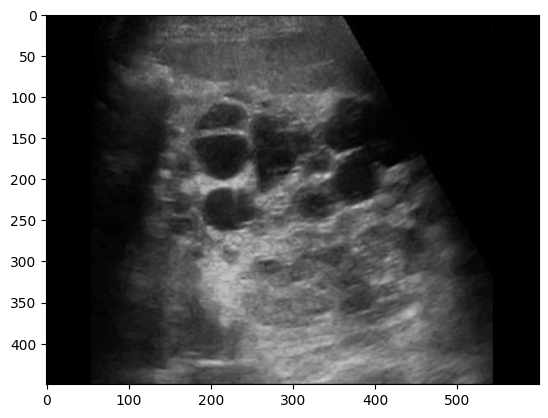

<Figure size 200x200 with 0 Axes>

In [ ]:
#Processed_CKD_Data = "/content/drive/MyDrive/Processed_CKD_Data"

img_path = os.path.join(ckd_data,'polycystic_kidney_28.jpg')

new_img = cv2.imread(img_path)
#scaled_img = new_img /255.0
#grey = cv2.cvtColor (new_img, cv2.COLOR_BGR2GRAY)


if new_img is None:
    print("Image not loaded properly.")
else:
    plt.imshow(new_img)
    plt.figure(figsize=(2,2))
    plt.show()


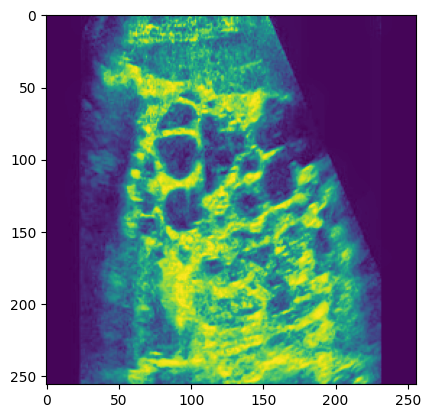

In [ ]:
clip_limit = 1.0  # Threshold for contrast limiting
tile_grid_size = (16, 16)

clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
clahe_img = clahe.apply(grey)

if clahe_img is None:
    print("Image not loaded properly.")
else:
    plt.imshow(clahe_img)
    plt.show()

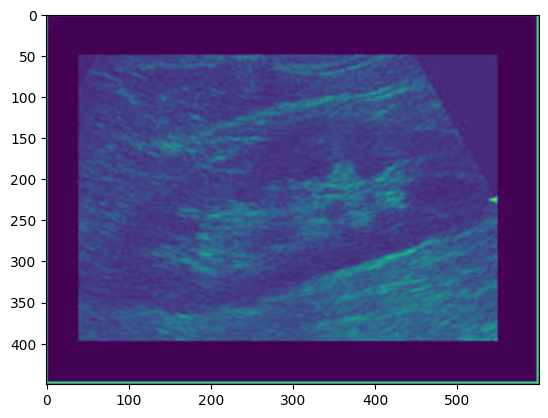

In [ ]:
Grey_img_path = os.path.join(data_dir,'CKD','polycystic_kidney_R_1.jpg')

grey_new_img = cv2.imread(img_path)
grey_img_new = cv2.cvtColor(grey_new_img, cv2.COLOR_BGR2GRAY)

if grey_img_new is None:
    print("Image not loaded properly.")
else:
    plt.imshow(grey_img_new)
    plt.show()




---


# **Data Augmentation**


---



In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Directory containing the original images
#org_data_dir = clahe_image
org_data_dir = not_ckd_data

# Directory where augmented images will be saved
augmented_data_dir = '/content/drive/MyDrive/augmented_Not_CKD_data'

# Create a directory for augmented images if it doesn't exist
os.makedirs(augmented_data_dir, exist_ok=True)

# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images by 20 degrees
    width_shift_range=0.2,  # randomly shift images horizontally by up to 20% of the image width
    height_shift_range=0.2,  # randomly shift images vertically by up to 20% of the image height
    shear_range=0.2,  # randomly apply shear transformation
    zoom_range=0.2,  # randomly zoom into images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # fill in missing pixels with the nearest available pixel
)

# Flow from directory and apply data augmentation
# Note: Set 'save_to_dir' to the directory where augmented images will be saved

datagen.flow_from_directory(
    data_dir,
    batch_size=32,
    save_to_dir=augmented_data_dir,
    save_prefix='augmented_',
    save_format='jpg'
)


Found 170 images belonging to 2 classes.


In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator

# Directory containing the original images
org_data_dir = not_ckd_data

# Directory where augmented images will be saved
augmented_data_dir = '/content/drive/MyDrive/augmented_Not_CKD_data'

# Create a directory for augmented images if it doesn't exist
os.makedirs(augmented_data_dir, exist_ok=True)

# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images by 20 degrees
    width_shift_range=0.2,  # randomly shift images horizontally by up to 20% of the image width
    height_shift_range=0.2,  # randomly shift images vertically by up to 20% of the image height
    shear_range=0.2,  # randomly apply shear transformation
    zoom_range=0.2,  # randomly zoom into images
    horizontal_flip=True,  # randomly flip images horizontally
    fill_mode='nearest'  # fill in missing pixels with the nearest available pixel
)

# Set the batch size and the target number of images to generate
batch_size = 8  # Adjust the batch size as needed
target_num_images = 100  # Set the target number of images to generate

# Initialize variables to keep track of the number of images generated
num_images_generated = 0
num_batches_generated = 0

# Loop until the target number of images is reached
while num_images_generated < target_num_images:
    # Flow from directory and apply data augmentation
    # Note: Set 'save_to_dir' to the directory where augmented images will be saved
    datagen.flow_from_directory(
        org_data_dir,
        batch_size=batch_size,
        save_to_dir=augmented_data_dir,
        save_prefix='augmented_',
        save_format='jpg',
        shuffle=False,  # Disable shuffling to control the order of images
        class_mode=None,  # Do not generate labels
        seed=42,  # Set seed for reproducibility
        subset='training',  # Specify subset as 'training' to augment only the training set
    )

    # Update the number of images generated
    num_images_generated += batch_size
    num_batches_generated += 1

print("Total number of batches generated:", num_batches_generated)
print("Total number of images generated:", num_images_generated)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
Total number of batches generated: 13
Total number of images generated: 104


In [ ]:
os.listdir(data_dir)

['CKD', 'Not_CKD']

In [ ]:
os.listdir(os.path.join(data_dir,'CKD'))

In [ ]:
#load dataset
#rather than loading everthing im memory , we will build
#tf.data.Datset??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir,batch_size=17)#builds an image dataset on the fly,
#dont need to build classes, it will do preprocessing, and resize
#building our data pipeline

Found 52 files belonging to 2 classes.


In [ ]:
data_iterator= data.as_numpy_iterator()#Allowing us to access our data pipeline,to loop through it

In [ ]:
data_iterator# useful for massive deep learning models

In [ ]:
batch=data_iterator.next()# will return a batch back
#accually accessing the data pipeline
#grabbing one batch

In [ ]:
batch[0].shape# batch- a batch of data

(5, 256, 256, 3)

In [ ]:
#class 1= Not CKD
#class 0= CKD
batch[1]

array([1, 1, 0, 0, 1], dtype=int32)

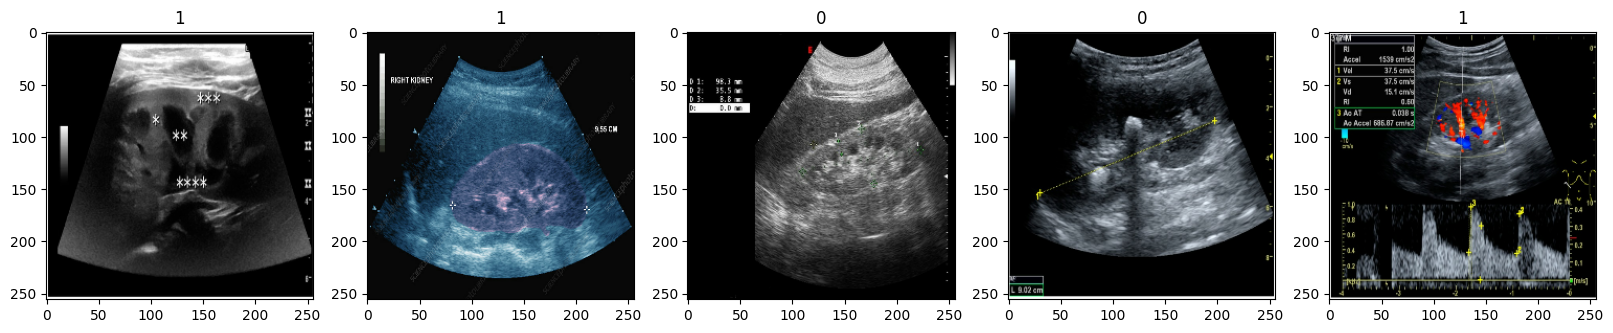

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

Preprocessing steps


In [ ]:
#preprocessing by scaling
scaled=batch[0]/255



In [ ]:
scaled.min()

0.0

In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
scaled_iterator=data.as_numpy_iterator()

In [ ]:
batch=scaled_iterator.next()

In [ ]:
batch

In [ ]:
len(data)

2

# New Section

In [ ]:
train_size= int(len(data)*.7)
val_size =int(len(data)*.2)
test_size=int(len(data)*.1)+1


In [ ]:
train_size+val_size+test_size

2

In [ ]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

**Building the Deep learning Model**

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten



In [ ]:
model=Sequential()

In [ ]:
#Building the model
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [ ]:
#compiling the model
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [ ]:
#Now We are going to train the model
logdir='Logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)



In [ ]:
Train_model= model.fit(train,epochs=10,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.6880 - accuracy: 0.5625
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.6958 - accuracy: 0.6562
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.6727 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.5044 - accuracy: 0.8750
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.4585 - accuracy: 0.8438
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.3614 - accuracy: 0.8438
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.3910 - accuracy: 0.8125
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.2211 - accuracy: 0.9688
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.2132 - accuracy: 0.9375
Epoch 10/10
1/1 [==============================] - 2s 2s/step - loss: 0.2166 - accuracy: 0.9688


KeyError: ignored

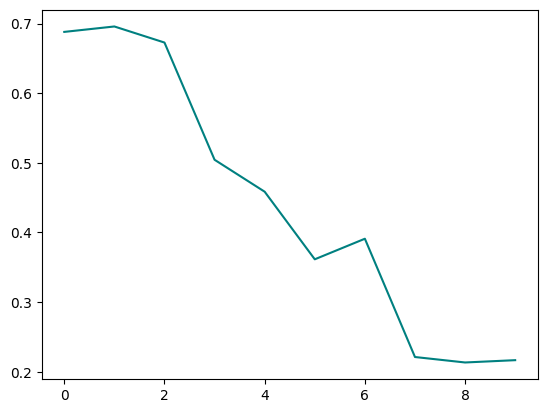

In [ ]:
#using matplotlib to plot the performance

fig=plt.figure()
plt.plot(Train_model.history['loss'],color='teal',label='loss')
plt.plot(Train_model.history['val_loss'],color='orange',label='validation Loss')
plt.suptitle('loss',frontsize=20)
plt.legend(loc='upper left')
plt.show()

KeyError: ignored

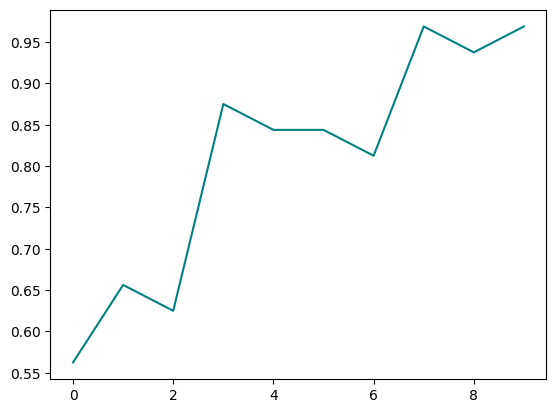

In [ ]:
#Evaluating the performance

fig=plt.figure()
plt.plot(Train_model.history['accuracy'],color='teal',label='accuracy')
plt.plot(Train_model.history['val_accuracy'],color='orange',label='Validation Accuracy')
plt.suptitle('Accuracy',frontsize=20)
plt.legend(loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X,y=batch
  pred=model.predict(X)
  pre.update_state(y,pred)
  re.update_state(y,pred)
  acc.update_state(y,pred)

1/1 [==============================] - 0s 433ms/step


In [ ]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0,Recall:1.0,Accuracy:1.0


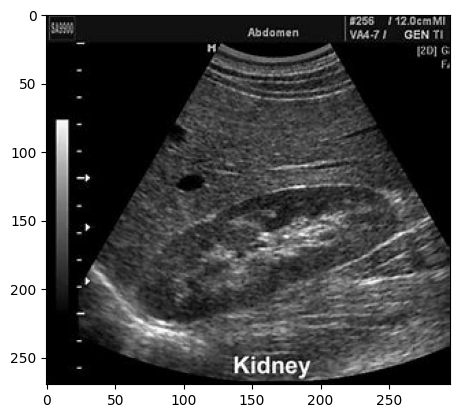

In [ ]:
#Test performance
import cv2

img = cv2.imread('/content/drive/MyDrive/data/ckd3.jpg')
plt.imshow(img)
plt.show()




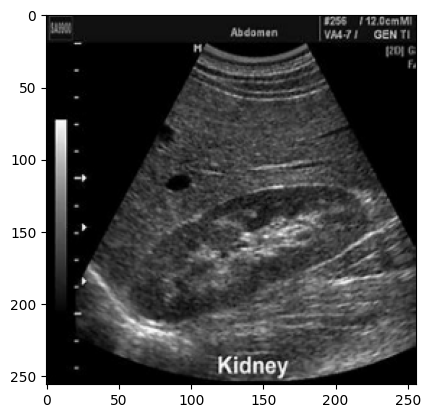

In [ ]:
resize= tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [ ]:

pred=model.predict(np.expand_dims(resize/255,0))



1/1 [==============================] - 0s 58ms/step


In [ ]:
pred

array([[0.9015529]], dtype=float32)

In [ ]:
if pred >0.5:
  print(f'predicted class is Not CKD')
else:
  print(f'predicted class is CKD')


predicted class is Not CKD


In [ ]:
#using ResNet50

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input, decode_predictions
import numpy as np


model= ResNet50(weights='imagenet')
img_path='/content/drive/MyDrive/data/ckd3.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])


35363/35363 [==============================] - 0s 0us/step
Predicted: [('n06359193', 'web_site', 0.17930596), ('n01968897', 'chambered_nautilus', 0.097844526), ('n03498962', 'hatchet', 0.05407535)]


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top=False)

img_path = '/content/drive/MyDrive/data/ckd3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

#print('Predicted:', decode_predictions(preds, top=3)[0])


In [ ]:
#VGG19 model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/data/ckd3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

#print('Predicted:', decode_predictions(block4_pool_features, top=3)[0])


1/1 [==============================] - 1s 686ms/step
